In [44]:
import pandas as pd
movies_data = pd.read_csv(r"C:/Users/YESCARE/Desktop/CODSOFT/IMDb Movies India.csv", encoding='latin1')
movies_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [6]:
movies_data.shape

(15509, 10)

In [7]:
movies_data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [33]:
movies_data = movies_data.dropna(subset=['Rating'])
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
     movies_data[col] = movies_data[col].fillna('Unknown')

In [34]:
from sklearn.preprocessing import LabelEncoder

encoders={}
for col in ['Primary Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    movies_data[col] = movies_data[col].astype(str)
    le = LabelEncoder()
    movies_data[col] = le.fit_transform(movies_data[col])
    encoders[col] = le

In [36]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor

X = movies_data[['Primary Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
Y = movies_data[['Rating']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

c:\Users\YESCARE\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

Y_prediction = model.predict(X_test)
print("MSE:", round(mean_squared_error(Y_test, Y_prediction),2))
print("R²:", round(r2_score(Y_test, Y_prediction), 2))

MSE: 1.65
R²: 0.11


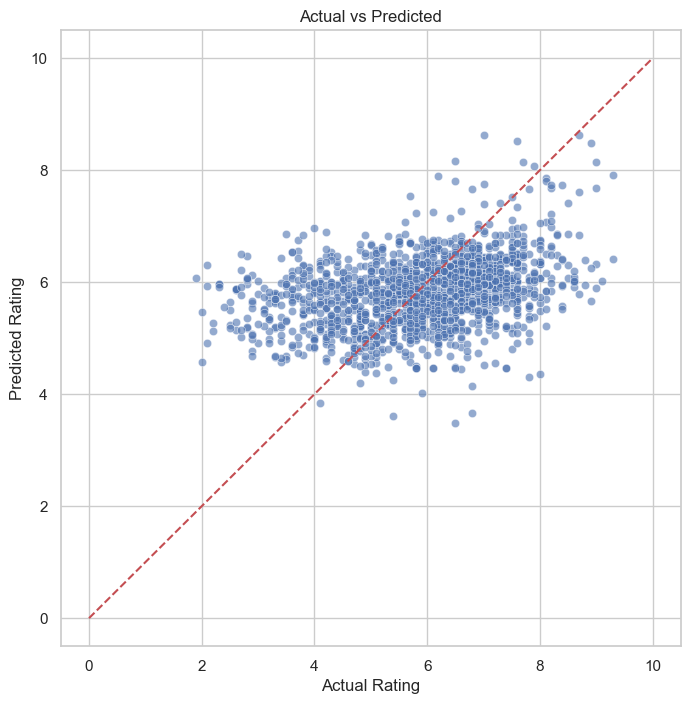

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.figure(figsize=(8,8))
sns.scatterplot(x=Y_test.squeeze(), y=Y_prediction.squeeze(), alpha=0.6)
plt.plot([0,10],[0,10],'r--')

plt.title('Actual vs Predicted')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.show()